<a id=top-page></a>
# Visualize 2D projections from different ranges in the cost function

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
results_location = '/Users/kamilazdybal/GitHub/nonlinear-decoding/results/'

In [3]:
# data_tag = 'H2-air'
# data_tag = 'CO-H2-air'
# data_tag = 'CH4-air'
data_tag = 'C2H4-air'

In [4]:
########################################################################
## Load data - Hydrogen/air flamelet
########################################################################

if data_tag == 'H2-air':
    
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-2]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-2]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-2]

    selected_state_variables = [0, 2, 4, 5, 6, 8]

########################################################################
## Load data - Syngas/air flamelet
########################################################################

if data_tag == 'CO-H2-air':
    
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-1]

    (n_observations, n_variables) = np.shape(state_space)

    print('\nThe data set has ' + str(n_observations) + ' observations.')
    print('\nThe data set has ' + str(n_variables) + ' variables.')

    selected_state_variables = [0, 1, 2, 4, 5, 8, 9]

########################################################################
## Load data - Methane/air flamelet
########################################################################

if data_tag == 'CH4-air':
   
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-1]

    species_to_remove = 'N2'
    (species_index, ) = np.where(state_space_names==species_to_remove)
    state_space = np.delete(state_space, np.s_[species_index], axis=1)
    state_space_sources = np.delete(state_space_sources, np.s_[species_index], axis=1)
    state_space_names = np.delete(state_space_names, np.s_[species_index])

    selected_state_variables = [0, 4, 5, 6, 14, 16]

########################################################################
## Load data - Ethylene/air flamelet
########################################################################

if data_tag == 'C2H4-air':
   
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-1]

    selected_state_variables = [0, 4, 5, 6, 15, 22]

(n_observations, n_variables) = np.shape(state_space)

print('\nThe data set has ' + str(n_observations) + ' observations.')
print('\nThe data set has ' + str(n_variables) + ' variables.')

state_space_names[selected_state_variables]


The data set has 60000 observations.

The data set has 32 variables.


array(['T', 'O2', 'OH', 'H2O', 'CO2', 'C2H4'], dtype=object)

In [5]:
cmap = cmc.lajolla
random_seeds_list = [i for i in range(0,100)]
decoder_architecture = (6,9,10)
n_components = 2
power = 4
vertical_shift = 1
penalty_function = 'log-sigma-over-peak'
learning_rate = 0.001
batch_size = n_observations
n_epochs = 20000
case_name = str(n_components) + 'D-LDM-lr-' + str(learning_rate) + '-bs-' + str(batch_size) + '-n-epochs-' + str(n_epochs) + '-architecture'
print(case_name)

2D-LDM-lr-0.001-bs-60000-n-epochs-20000-architecture


In [6]:
architecture_without = str(n_variables) + '-' + str(n_components) + '-' + '-'.join([str(i) for i in decoder_architecture]) + '-' + str(len(selected_state_variables))
architecture_with = str(n_variables) + '-' + str(n_components) + '-' + '-'.join([str(i) for i in decoder_architecture]) + '-' + str(len(selected_state_variables) + n_components*2)

***

## Upload cost function assessments

In [7]:
costs_without_Seta = []
costs_with_Seta = []

for random_seed in random_seeds_list:

    # Without Seta: - - - - - - - - - - - - - - - - - - - - - - - - - -
    
    variance_data_without = pickle.load(open(results_location + 'QoIAwareProjection-VarianceData-without-Seta-' + data_tag + '-SLF-' + case_name + '-' + architecture_without + '-random-seed-' + str(random_seed) + '.pkl', 'rb'))

    costs_without = analysis.cost_function_normalized_variance_derivative(variance_data_without,
                                                                        penalty_function=penalty_function,
                                                                        norm=None,
                                                                        power=power,
                                                                        vertical_shift=vertical_shift,
                                                                        integrate_to_peak=False)

    # With Seta: - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    variance_data_with = pickle.load(open(results_location + 'QoIAwareProjection-VarianceData-with-Seta-' + data_tag + '-SLF-' + case_name + '-' + architecture_with + '-random-seed-' + str(random_seed) + '.pkl', 'rb'))
    
    costs_with = analysis.cost_function_normalized_variance_derivative(variance_data_with,
                                                                  penalty_function=penalty_function,
                                                                  norm=None,
                                                                  power=power,
                                                                  vertical_shift=vertical_shift,
                                                                  integrate_to_peak=False)

    # Upload the current cost statistics: - - - - - - - - - - - - - - -

    costs_without_for_statistics = costs_without
    costs_with_for_statistics = costs_with
    
    averaged_out_cost_without = np.linalg.norm(costs_without_for_statistics)/len(costs_without_for_statistics)
    averaged_out_cost_with = np.linalg.norm(costs_with_for_statistics)/len(costs_with_for_statistics)

    costs_without_Seta.append(averaged_out_cost_without)
    costs_with_Seta.append(averaged_out_cost_with)

***

## Visualize the PDFs

Text(0.5, 1.0, 'C2H4-air, 20000 epochs, architecture: 32-2-6-9-10-10')

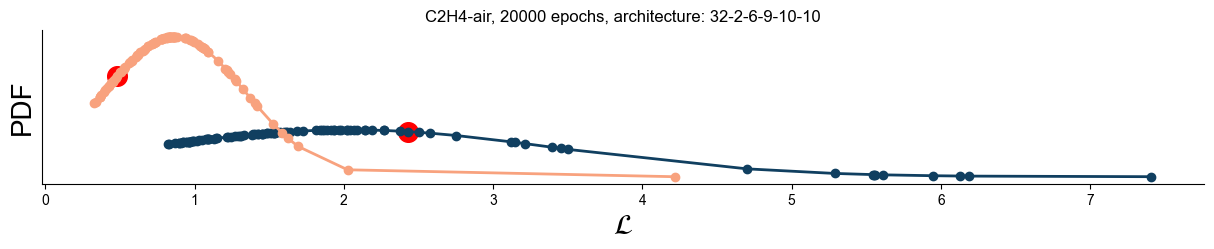

In [8]:
PDF_costs_without_Seta = norm.pdf(costs_without_Seta, np.mean(costs_without_Seta), np.std(costs_without_Seta))
PDF_costs_with_Seta = norm.pdf(costs_with_Seta, np.mean(costs_with_Seta), np.std(costs_with_Seta))

color_map_colors = cmc.batlow
cluster_colors = color_map_colors(np.linspace(0, 1, 10))

fig = plt.figure(figsize=(15,2))

(_, idx_without) = preprocess.order_variables(np.array(costs_without_Seta)[None,:], method='mean', descending=True)
plt.plot(np.array(costs_without_Seta)[idx_without], PDF_costs_without_Seta[idx_without], '-o', lw=2, c=cluster_colors[1])

(_, idx_with) = preprocess.order_variables(np.array(costs_with_Seta)[None,:], method='mean', descending=True)
plt.plot(np.array(costs_with_Seta)[idx_with], PDF_costs_with_Seta[idx_with], '-o', lw=2, c=cluster_colors[7])

random_seed = 77
plt.scatter(np.array(costs_without_Seta)[random_seed], PDF_costs_without_Seta[random_seed], c='r', s=200)
plt.scatter(np.array(costs_with_Seta)[random_seed], PDF_costs_with_Seta[random_seed], c='r', s=200)

plt.yticks([])
plt.xlabel('$\mathcal{L}$', fontsize=20)
plt.ylabel('PDF', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title(data_tag + ', ' + str(n_epochs) + ' epochs, architecture: ' + architecture_with)

***

## Visualize 2D projections from a particular random seed

In [9]:
(X_CS, centers, scales) = preprocess.center_scale(state_space, scaling='0to1')
S_CS = state_space_sources / scales

In [10]:
def visualize_projection(X_AE, color, ticks):
    
    fig = plt.figure(figsize=(8,5))
    spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])
 
    figure = fig.add_subplot(spec[0,0])
    scat = plt.scatter(X_AE[:,0], X_AE[:,1], s=10, c=color, cmap=cmap)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["bottom"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    cbar = plt.colorbar(scat, ticks=ticks, aspect=20)
    for t in cbar.ax.get_yticklabels():
        t.set_fontproperties('Arial')
        t.set_fontsize(16)

    return plt

### Selected projections when $\mathbf{S}_{\pmb{\eta}}$ are not included at the decoder output

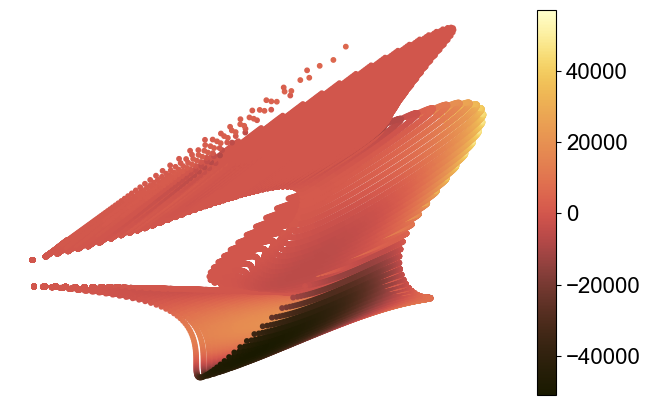

In [11]:
if data_tag == 'H2-air': 
    random_seed = 97
    ticks = [-10000,-5000,0,5000,10000]
if data_tag == 'CH4-air': 
    random_seed = 12
    ticks = [-30000, -15000, 0, 15000]
if data_tag == 'C2H4-air': 
    random_seed = 15
    ticks = [-40000, -20000, 0, 20000, 40000]

basis_without_Seta = pd.read_csv(results_location + 'QoIAwareProjection-basis-without-Seta-' + data_tag + '-SLF-' + case_name + '-' + architecture_without + '-random-seed-' + str(random_seed) + '.csv', sep = ',', header=None).to_numpy()

X_AE_without_Seta = np.dot(X_CS, basis_without_Seta)
S_AE_without_Seta = np.dot(S_CS, basis_without_Seta)

plt = visualize_projection(X_AE_without_Seta, S_AE_without_Seta[:,0], ticks=ticks)

plt.savefig('without-Seta-' + data_tag + '-random-seed-' + str(random_seed) + '.png', dpi=300, bbox_inches='tight')

### Selected projections when $\mathbf{S}_{\pmb{\eta}}$ are included at the decoder output

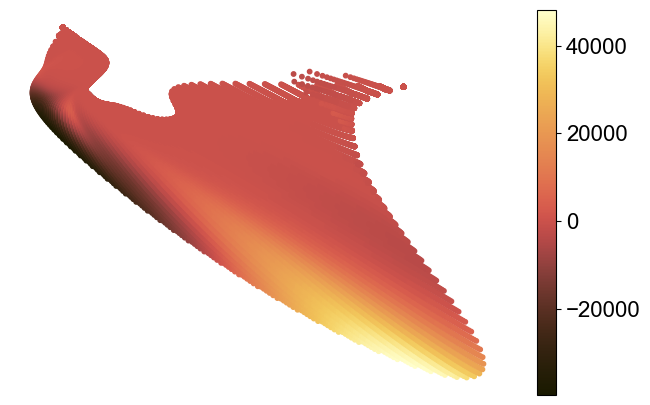

In [13]:
if data_tag == 'H2-air': 
    random_seed = 97
    ticks = [-4000,0,4000,8000]
if data_tag == 'CH4-air': 
    random_seed = 67
    ticks = [-40000, -20000, 0, 20000, 40000]
if data_tag == 'C2H4-air': 
    random_seed = 82
    ticks = [-20000, 0, 20000, 40000]

basis_with_Seta = pd.read_csv(results_location + 'QoIAwareProjection-basis-with-Seta-' + data_tag + '-SLF-' + case_name + '-' + architecture_with + '-random-seed-' + str(random_seed) + '.csv', sep = ',', header=None).to_numpy()

X_AE_with_Seta = np.dot(X_CS, basis_with_Seta)
S_AE_with_Seta = np.dot(S_CS, basis_with_Seta)

plt = visualize_projection(X_AE_with_Seta, S_AE_with_Seta[:,0], ticks)

plt.savefig('with-Seta-' + data_tag + '-random-seed-' + str(random_seed) + '.png', dpi=300, bbox_inches='tight')

***